# Logistic Regression

Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

When we talk about Logistic Regression in general, we usually mean Binary logistic regression, although there are other types of Logistic Regression as well.

Logistic Regression can be divided into types based on the type of classification it does. With that in view, there are 3 types of Logistic Regression. Let’s talk about each of them:

### Binary Logistic Regression:

Binary Logistic Regression is the most commonly used type. It is the type we already discussed when defining Logistic Regression. In this type, the dependent/target variable has two distinct values, either 0 or 1, malignant or benign, passed or failed, admitted or not admitted.

### Multinomial Logistic Regression:

Multinomial Logistic Regression deals with cases when the target or independent variable has three or more possible values.

### Ordinal Logistic Regression

Ordinal Logistic Regression is used in cases when the target variable is of ordinal nature. In this type, the categories are ordered in a meaningful manner and each category has quantitative significance. Moreover, the target variable has more than two categories. For example, the grades obtained on an exam have categories that have quantitative significance and they are ordered. Keeping it simple, the grades can be A, B, or C.


### Binary Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
model.classes_

array([0, 1])

In [6]:
model.intercept_

array([-1.04608067])

In [7]:
model.coef_

array([[0.51491375]])

In [8]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [9]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
classification_report(y, model.predict(x))

'              precision    recall  f1-score   support\n\n           0       1.00      0.75      0.86         4\n           1       0.86      1.00      0.92         6\n\n    accuracy                           0.90        10\n   macro avg       0.93      0.88      0.89        10\nweighted avg       0.91      0.90      0.90        10\n'

Plotting

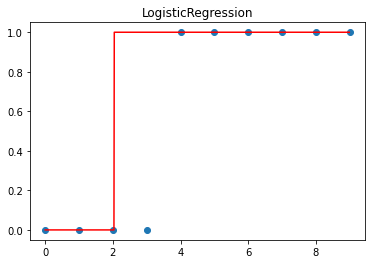

In [12]:
# plot the dataset
plt.scatter(x, y)
# plot the line of best fit
xaxis = np.arange(x.min(), x.max(), 0.01)
yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
plt.plot(xaxis, yaxis, color='r')
# show the plot
plt.title(type(model).__name__)
plt.show()

### Multinomial Logistic Regression

Imports Section

In [13]:
from collections import Counter
from sklearn.datasets import make_classification

Define Dataset

In [14]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

In [15]:
X.shape

(1000, 10)

In [16]:
y.shape

(1000,)

In [17]:
Counter(y)

Counter({1: 334, 0: 332, 2: 334})

Model Definition

In [35]:
model = LogisticRegression(multi_class="multinomial", solver='lbfgs',penalty='l2', C=1.0)

model.fit(X, y)

row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]

yhat = model.predict(X)

yhat

array([1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2,
       1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1,
       0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1,
       2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 2,

### Ordinal Logistic Regression

In [46]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [39]:
data_diam = pd.read_csv('diamonds.csv')
data_diam

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


EDA

In [40]:
data_diam.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

To work with the ordinal models from statsmodel we are required to convert this target variable into a categorical ordered form that can be done using the following lines of codes:



In [42]:
cat_type = CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

data_diam["cut"] = data_diam["cut"].astype(cat_type)

In [43]:
data_diam['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [45]:
data_diam['volume'] = data_diam['x']*data_diam['y']*data_diam['z']
data_diam.drop(['x','y','z'],axis=1,inplace=True)

Data Visualization

Text(0.5, 1.0, 'Distribution by Volume')

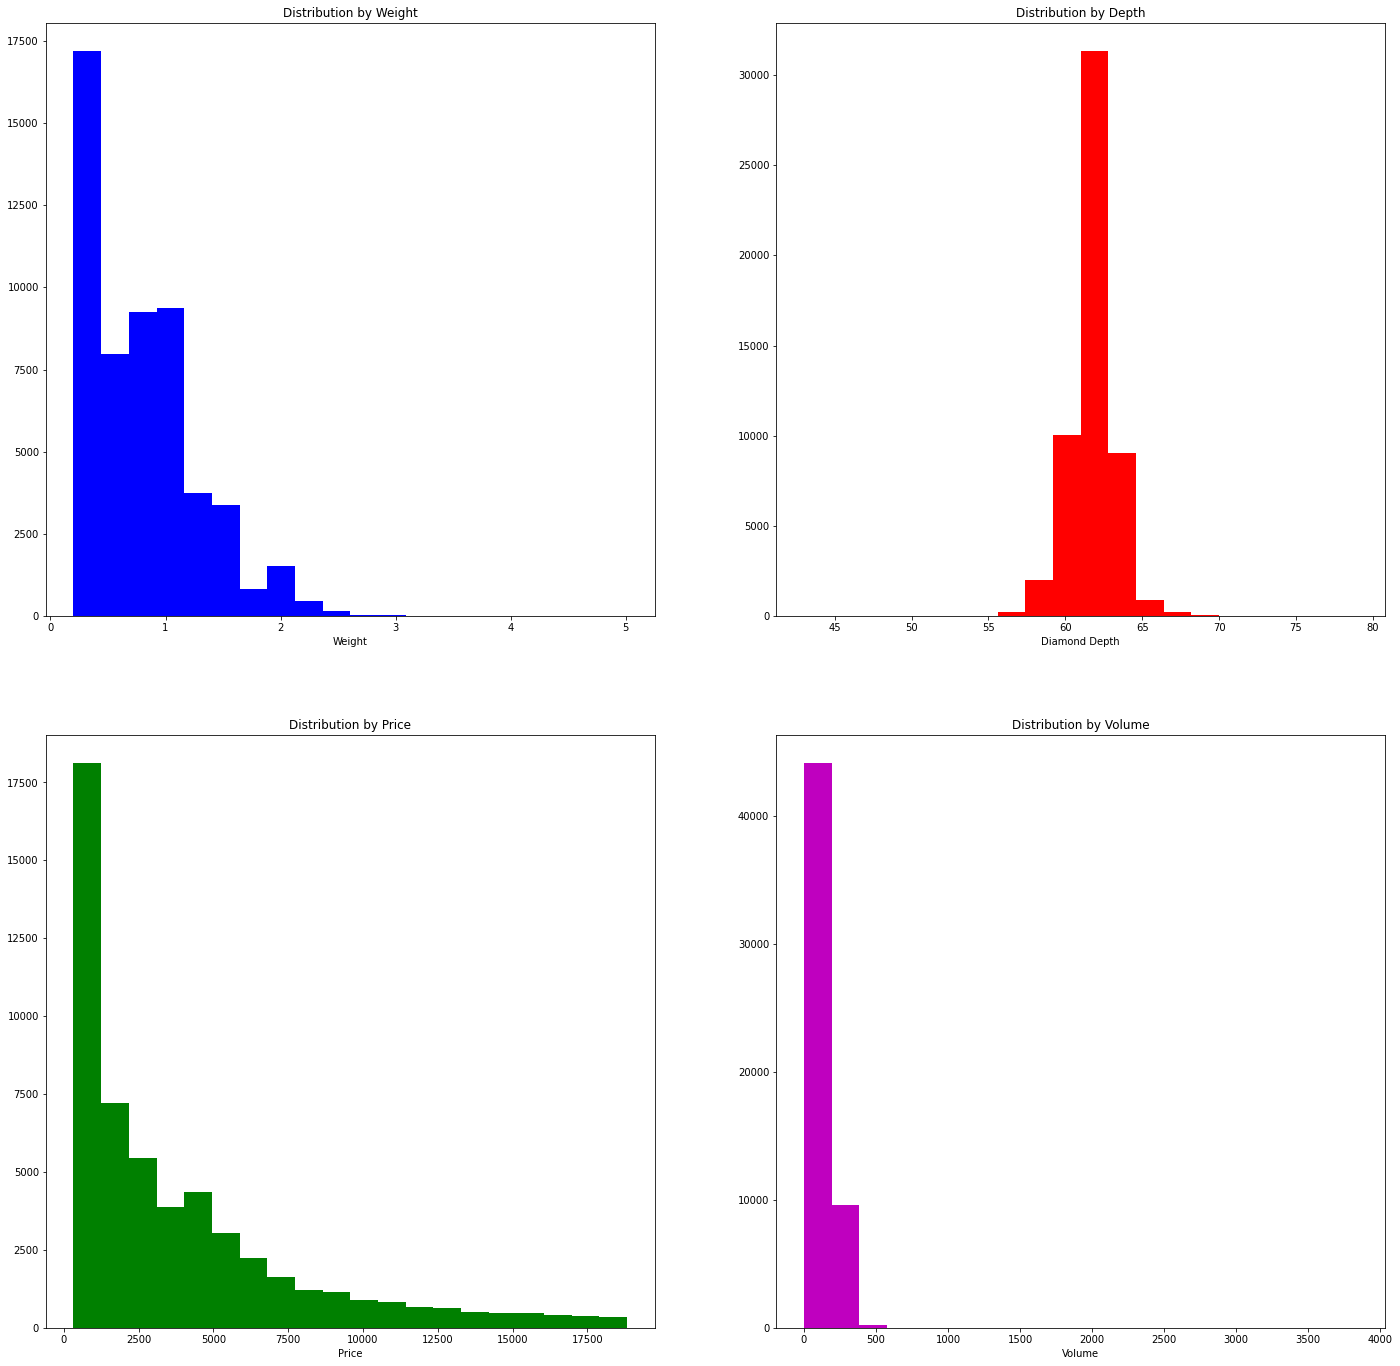

In [53]:
plt.figure(figsize=[24,24])
 
plt.subplot(221)
plt.hist(data_diam['carat'],bins=20,color='b')
plt.xlabel('Weight')
plt.title('Distribution by Weight')

plt.subplot(222)
plt.hist(data_diam['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by Depth')

plt.subplot(222)
plt.hist(data_diam['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by Depth')

plt.subplot(223)
plt.hist(data_diam['price'],bins=20,color='g')
plt.xlabel('Price')
plt.title('Distribution by Price')

plt.subplot(224)
plt.hist(data_diam['volume'],bins=20,color='m')
plt.xlabel('Volume')
plt.title('Distribution by Volume')

Fitting Ordinal Regressor

In [55]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(data_diam['cut'],
                        data_diam[['volume', 'price', 'carat']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.369122
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73850.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Fri, 08 Jul 2022                                         
Time:                        16:41:45                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0060      0.001     10.108      0.000       0.005       0.007
price              3.511e-05   3.01e-06     11.658      0.000    2.92e-05     4.1e-05
carat                -1.1049      0.097    -11.353      0.000      -1.296      -0.914
Fair/Good            -1.8589      0.016   -119.403      0.000      -1.889      -1.828
Good/Ideal           -0.3292      0.014    -24.056      0.000      -0.356      -0.302
Ideal/Very Good       0.2053      0.006     35.080      0.000       0.194       0.217
Very Good/Premium    -0.4986      0.008    -60.605      0.000      -0.515      -0.483
=====================================================================================
"""

### Ordered logic regression

In [56]:
mod_prob = OrderedModel(data_diam['cut'],
                        data_diam[['volume', 'price', 'carat']],
                        distr='logit')
 
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.369215
         Iterations: 36
         Function evaluations: 42
         Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Fri, 08 Jul 2022                                         
Time:                        16:43:00                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   5.31e-06      4.425      0.000    1.31e-05    3.39e-05
carat                -1.5407      0.286     -5.394      0.000      -2.100      -0.981
Fair/Good            -3.2836      0.031   -105.758      0.000      -3.344      -3.223
Good/Ideal            0.4038      0.015     27.062      0.000       0.375       0.433
Ideal/Very Good       0.7301      0.006    116.508      0.000       0.718       0.742
Very Good/Premium    -0.0055      0.008     -0.653      0.514      -0.022       0.011
=====================================================================================
"""

Predicting from model

In [57]:
predicted = res_log.model.predict(res_log.params, exog=data_diam[['volume', 'price', 'carat']])
predicted

/usr/local/lib64/python3.10/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.03443606, 0.10308231, 0.42201809, 0.21495304, 0.2255105 ],
       [0.03468862, 0.10372996, 0.42298246, 0.21440769, 0.22419127],
       [0.03447851, 0.10319128, 0.42218114, 0.21486137, 0.2252877 ],
       ...,
       [0.03052062, 0.09285935, 0.40522189, 0.22335735, 0.2480408 ],
       [0.02973833, 0.0907751 , 0.40141256, 0.22500614, 0.25306787],
       [0.02970169, 0.09067712, 0.4012301 , 0.22508295, 0.25330815]])